In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings ("ignore")
import missingno as msno
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

pd.set_option('display.max.rows',230)
pd.set_option('display.max.columns',230)

# Task 1: Data Exploration

In [2]:
# loading the dataset

df=pd.read_csv('consultation.csv')
df.head()

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,isWhiteListUser,chatSeconds,queue,freeCall,freeChat,createdAt,updatedAt,__v,statementEntryId,chatStartTime,chatEndTime,timeDuration,callChannel,callIvrType,callStatus,CallSid,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,region,userCallStatus,userOnCallDuration,RecordingUrl,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z,0,656922f3919324acb6e8713b,2023-12-01T00:07:33.248Z,2023-12-01T00:07:33.773Z,0.008750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01T00:08:51.903Z,2023-12-01T00:09:56.111Z,0,65692413919324acb6e87443,2023-12-01T00:09:55.808Z,2023-12-01T00:09:56.052Z,0.004067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01T00:17:22.270Z,2023-12-01T00:22:04.382Z,0,65692612919324acb6e8773a,2023-12-01T00:22:04.072Z,2023-12-01T00:22:04.325Z,0.004217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01T00:24:41.672Z,2023-12-01T00:29:44.022Z,0,656927c9919324acb6e87b31,2023-12-01T00:29:43.556Z,2023-12-01T00:29:43.960Z,0.006733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,False,300.0,False,False,False,2023-12-01T00:48:53.744Z,2023-12-01T00:50:33.153Z,0,65692d75919324acb6e882df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns=df.columns
columns

Index(['_id', 'user', 'chatStatus', 'guru', 'guruName', 'gid', 'uid',
       'consultationType', 'website', 'refundStatus', 'isWhiteListUser',
       'chatSeconds', 'queue', 'freeCall', 'freeChat', 'createdAt',
       'updatedAt', '__v', 'statementEntryId', 'chatStartTime', 'chatEndTime',
       'timeDuration', 'callChannel', 'callIvrType', 'callStatus', 'CallSid',
       'amount', 'astrologerCallStatus', 'astrologerOnCallDuration',
       'astrologersEarnings', 'netAmount', 'region', 'userCallStatus',
       'userOnCallDuration', 'RecordingUrl', 'feedback', 'hideHistory',
       'cardPosition', 'Remedies', 'offer', 'refunds[0]', 'source',
       'callSeconds', 'complementaryCallOrganiser', 'disconnectedBy'],
      dtype='object')

In [4]:
df.shape

(28027, 45)

In [5]:
df.isnull().sum()/df.shape[0]*100

_id                            0.000000
user                           0.000000
chatStatus                    30.370714
guru                           0.000000
guruName                       0.000000
gid                            0.000000
uid                            0.000000
consultationType               0.000000
website                        0.000000
refundStatus                   0.000000
isWhiteListUser                0.000000
chatSeconds                   30.374282
queue                          0.000000
freeCall                       0.000000
freeChat                       0.000000
createdAt                      0.000000
updatedAt                      0.000000
__v                            0.000000
statementEntryId               0.538766
chatStartTime                 66.710672
chatEndTime                   53.505548
timeDuration                  23.652193
callChannel                   69.643558
callIvrType                   70.164484
callStatus                    69.525814


In [6]:
# identifying columns which have 1 or more than 1 missing values

len(df.columns[df.isnull().any()])
# we have 29 columns which have 1 or more than 1 missing values

missing_columns=df.columns[df.isnull().any()]
missing_columns

29

Index(['chatStatus', 'chatSeconds', 'statementEntryId', 'chatStartTime',
       'chatEndTime', 'timeDuration', 'callChannel', 'callIvrType',
       'callStatus', 'CallSid', 'amount', 'astrologerCallStatus',
       'astrologerOnCallDuration', 'astrologersEarnings', 'netAmount',
       'region', 'userCallStatus', 'userOnCallDuration', 'RecordingUrl',
       'feedback', 'hideHistory', 'cardPosition', 'Remedies', 'offer',
       'refunds[0]', 'source', 'callSeconds', 'complementaryCallOrganiser',
       'disconnectedBy'],
      dtype='object')

# identifying missing values in the categorical columns

In [7]:
categorical_columns=df[missing_columns].select_dtypes(include='object').columns
columns=list(categorical_columns)
columns

['chatStatus',
 'statementEntryId',
 'chatStartTime',
 'chatEndTime',
 'callChannel',
 'callIvrType',
 'callStatus',
 'CallSid',
 'astrologerCallStatus',
 'region',
 'userCallStatus',
 'RecordingUrl',
 'feedback',
 'hideHistory',
 'cardPosition',
 'Remedies',
 'offer',
 'refunds[0]',
 'source',
 'complementaryCallOrganiser',
 'disconnectedBy']

In [8]:
missing_count=df[missing_columns].select_dtypes(include='object').isnull().sum()
# missing_count

In [9]:
missing_percentage=df[missing_columns].select_dtypes(include='object').isnull().sum()/df.shape[0]*100
# missing_percentage

In [10]:
# converting into one data frame

categorical_missing=pd.DataFrame({'column':columns,'count':missing_count,'percentage':missing_percentage}).reset_index(drop=True)
categorical_missing

,column,count,percentage
0,chatStatus,8512,30.370714
1,statementEntryId,151,0.538766
2,chatStartTime,18697,66.710672
3,chatEndTime,14996,53.505548
4,callChannel,19519,69.643558
5,callIvrType,19665,70.164484
6,callStatus,19486,69.525814
7,CallSid,19662,70.153780
8,astrologerCallStatus,11769,41.991651
9,region,19008,67.820316


In [11]:
missing_40=categorical_missing.loc[categorical_missing['percentage']>=40,'column']
len(categorical_missing.loc[categorical_missing['percentage']>=40,'column'])
missing_40
# we have 17 categorical columns which contain more than 40 % of missing values,in ideal condition we would delete these columns
# because of insufficient information, but looking into data set some of the columns may be required in our
# analysis, so we will delete those columns which have more than 70% of data.

17

2                  chatStartTime
3                    chatEndTime
4                    callChannel
5                    callIvrType
6                     callStatus
7                        CallSid
8           astrologerCallStatus
9                         region
10                userCallStatus
11                  RecordingUrl
12                      feedback
14                  cardPosition
15                      Remedies
17                    refunds[0]
18                        source
19    complementaryCallOrganiser
20                disconnectedBy
Name: column, dtype: object

In [12]:
# droping columns which have more than 70% of missing data

columns_70=categorical_missing.loc[categorical_missing['percentage']>=70,'column']
columns_70

df.drop(columns_70,axis=1,inplace=True)

5                    callIvrType
7                        CallSid
11                  RecordingUrl
12                      feedback
14                  cardPosition
15                      Remedies
17                    refunds[0]
19    complementaryCallOrganiser
20                disconnectedBy
Name: column, dtype: object

In [13]:
# now we will analyse each of these columns separately and try to fill it will best suitable option

df.select_dtypes(include='object').isnull().sum()/df.shape[0]*100

_id                      0.000000
user                     0.000000
chatStatus              30.370714
guru                     0.000000
guruName                 0.000000
consultationType         0.000000
website                  0.000000
refundStatus             0.000000
createdAt                0.000000
updatedAt                0.000000
statementEntryId         0.538766
chatStartTime           66.710672
chatEndTime             53.505548
callChannel             69.643558
callStatus              69.525814
astrologerCallStatus    41.991651
region                  67.820316
userCallStatus          66.657152
hideHistory             31.002248
offer                   33.000321
source                  41.873907
dtype: float64

In [14]:
df.select_dtypes(include='object')

,_id,user,chatStatus,guru,guruName,consultationType,website,refundStatus,createdAt,updatedAt,statementEntryId,chatStartTime,chatEndTime,callChannel,callStatus,astrologerCallStatus,region,userCallStatus,hideHistory,offer,source
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,Chat,gurucool,no-refund,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z,656922f3919324acb6e8713b,2023-12-01T00:07:33.248Z,2023-12-01T00:07:33.773Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,Chat,gurucool,no-refund,2023-12-01T00:08:51.903Z,2023-12-01T00:09:56.111Z,65692413919324acb6e87443,2023-12-01T00:09:55.808Z,2023-12-01T00:09:56.052Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,Chat,gurucool,no-refund,2023-12-01T00:17:22.270Z,2023-12-01T00:22:04.382Z,65692612919324acb6e8773a,2023-12-01T00:22:04.072Z,2023-12-01T00:22:04.325Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,Chat,gurucool,no-refund,2023-12-01T00:24:41.672Z,2023-12-01T00:29:44.022Z,656927c9919324acb6e87b31,2023-12-01T00:29:43.556Z,2023-12-01T00:29:43.960Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,Chat,gurucool,no-refund,2023-12-01T00:48:53.744Z,2023-12-01T00:50:33.153Z,65692d75919324acb6e882df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,6595ef62849de2bb564ed9fb,6592ef86270572b0ca26a3e3,completed,6522d40f0562f2f5e506c1c4,Super Guru Ji,Chat,gurucool,no-refund,2024-01-03T23:36:02.872Z,2024-01-03T23:37:57.348Z,6595ef62849de2bb564ed9fd,2024-01-03T23:36:10.118Z,2024-01-03T23:37:57.259Z,NaN,NaN,completed,Indian,completed,False,normal,Test
28023,6595f1f3849de2bb564edd7e,6592ef86270572b0ca26a3e3,NaN,65054784f5f203225bfcdcd1,Tarot Rupanshi,Call,app,no-refund,2024-01-03T23:46:59.765Z,2024-01-03T23:47:50.319Z,6595f1f4849de2bb564edd81,NaN,NaN,Normal,failed,failed,NaN,NaN,False,normal,Test
28024,6595f23d849de2bb564ee1c9,6592ef86270572b0ca26a3e3,NaN,65054786f5f203225bfcdd0d,Astro Sanjeev,Call,app,no-refund,2024-01-03T23:48:13.271Z,2024-01-03T23:48:37.907Z,6595f23d849de2bb564ee1cc,NaN,NaN,Normal,failed,completed,NaN,canceled,False,normal,Test
28025,6595f384883c1bbae79c58e3,6595f36c883c1bbae79c57c9,failed,6522d40f0562f2f5e506c1c4,Super Guru Ji,Chat,gurucool,no-refund,2024-01-03T23:53:40.997Z,2024-01-03T23:54:16.451Z,6595f385883c1bbae79c58e5,NaN,NaN,NaN,NaN,no-answer,NaN,NaN,False,first,Production


In [15]:
# filling missing values in chatstatus with unknown 

df['chatStatus']=df['chatStatus'].fillna('unknown')

In [16]:
# filling callchannel with unknown,because customer took consultation on chat.

df['callChannel'].value_counts()

df['callChannel']=df['callChannel'].fillna('unknown')

callChannel
Normal    8508
Name: count, dtype: int64

In [17]:
# filling callstatus with unknown,because customer took consultation on chat

df['callStatus'].value_counts()
df['callStatus']=df['callStatus'].fillna('unknown')

callStatus
completed     3453
no-answer     1729
busy          1270
failed        1214
incomplete     875
Name: count, dtype: int64

In [18]:
# filling astrologerCallStatus with unknown

df['astrologerCallStatus'].value_counts()

df['astrologerCallStatus']=df['astrologerCallStatus'].fillna('unknown')

astrologerCallStatus
completed    9172
no-answer    5367
busy         1342
failed        377
Name: count, dtype: int64

In [19]:
# filling region with unknown

df['region'].value_counts()

df['region']=df['region'].fillna('unknown')

region
Indian    9019
Name: count, dtype: int64

In [20]:
# filling usercallstatus with unknown

df['userCallStatus'].value_counts()

df['userCallStatus']=df['userCallStatus'].fillna('unknown')

userCallStatus
completed    7621
canceled      992
busy          439
no-answer     207
failed         86
Name: count, dtype: int64

In [21]:
# filling hidehistory with False

df['hideHistory'].value_counts()

df['hideHistory']=df['hideHistory'].fillna(False)

hideHistory
False    19175
True       163
Name: count, dtype: int64

In [22]:
# filling offer with no offer

df['offer'].value_counts()

df['offer']=df['offer'].fillna('no offer')

offer
first     15887
normal     2237
second      310
fifth       234
third        91
fourth       19
Name: count, dtype: int64

In [23]:
# filling source with unknown

df['source'].value_counts()

df['source']=df['source'].fillna('unknown')

source
Production    16256
Test             35
Name: count, dtype: int64

In [24]:
# our datetime columns are in object dtype,lets convert it to datetime format first

df['chatStartTime']=pd.to_datetime(df['chatStartTime'])

In [25]:
df['chatEndTime']=pd.to_datetime(df['chatEndTime'])

In [26]:
df['createdAt']=pd.to_datetime(df['createdAt'])
df['updatedAt']=pd.to_datetime(df['updatedAt'])

In [27]:
# we will keep the missing rows in chatstart and chatend as it is, because we dont know the time,
# and we cannot enter any string values 

# identifying missing values in the numerical columns

In [28]:
number=df.select_dtypes(include='number').columns

numerical_columns=df[number].columns[df[number].isnull().any()]

# we have 8 numerical columns which contains missing values

In [29]:
count=df[numerical_columns].isnull().sum()
count

chatSeconds                  8513
timeDuration                 6629
amount                      19011
astrologerOnCallDuration    19662
astrologersEarnings         19011
netAmount                   19011
userOnCallDuration          19662
callSeconds                 28025
dtype: int64

In [30]:
percentage=df[numerical_columns].isnull().sum()/df.shape[0]*100
percentage

chatSeconds                 30.374282
timeDuration                23.652193
amount                      67.831020
astrologerOnCallDuration    70.153780
astrologersEarnings         67.831020
netAmount                   67.831020
userOnCallDuration          70.153780
callSeconds                 99.992864
dtype: float64

In [31]:
# converting into one data frame

numerical=pd.DataFrame({'column':numerical_columns,'count':count,'percentage':percentage}).reset_index(drop=True)
numerical

,column,count,percentage
0,chatSeconds,8513,30.374282
1,timeDuration,6629,23.652193
2,amount,19011,67.831020
3,astrologerOnCallDuration,19662,70.153780
4,astrologersEarnings,19011,67.831020
5,netAmount,19011,67.831020
6,userOnCallDuration,19662,70.153780
7,callSeconds,28025,99.992864


In [32]:
numerical_40=numerical.loc[numerical['percentage']>=40,'column']
numerical_40
len(numerical_40)

# we have 6 columns which contains more than 40% of missing data,which needs to be droped 
# but we cannot drop these columns, because these columns will be required in our analysis
# so we will inpute with zero

2                      amount
3    astrologerOnCallDuration
4         astrologersEarnings
5                   netAmount
6          userOnCallDuration
7                 callSeconds
Name: column, dtype: object

6

In [33]:
# droping call seconds data, as it contains 99% missing values

df.drop('callSeconds',axis=1,inplace=True)

In [34]:
# filling missing values in numeric columns with 0

df[['chatSeconds','timeDuration','amount','astrologerOnCallDuration','astrologersEarnings','netAmount','userOnCallDuration']]=df[['chatSeconds','timeDuration','amount','astrologerOnCallDuration','astrologersEarnings','netAmount','userOnCallDuration']].fillna(0)

In [35]:
df.select_dtypes(include='number').isnull().sum()

gid                         0
uid                         0
chatSeconds                 0
__v                         0
timeDuration                0
amount                      0
astrologerOnCallDuration    0
astrologersEarnings         0
netAmount                   0
userOnCallDuration          0
dtype: int64

In [36]:
# analysing time duration columns

df.loc[df['timeDuration']<0].shape[0]

# 3846 rows are in negative time, we will convert it to positive

df['timeDuration']=df['timeDuration'].abs()

3846

# now our data is cleaned, we can start analysing our dataset

In [37]:
df.head()

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,isWhiteListUser,chatSeconds,queue,freeCall,freeChat,createdAt,updatedAt,__v,statementEntryId,chatStartTime,chatEndTime,timeDuration,callChannel,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,region,userCallStatus,userOnCallDuration,hideHistory,offer,source
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:04:02.993000+00:00,2023-12-01 00:07:33.833000+00:00,0,656922f3919324acb6e8713b,2023-12-01 00:07:33.248000+00:00,2023-12-01 00:07:33.773000+00:00,0.008750,unknown,unknown,0.0,unknown,0.0,0.0,0.0,unknown,unknown,0.0,False,no offer,unknown
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:08:51.903000+00:00,2023-12-01 00:09:56.111000+00:00,0,65692413919324acb6e87443,2023-12-01 00:09:55.808000+00:00,2023-12-01 00:09:56.052000+00:00,0.004067,unknown,unknown,0.0,unknown,0.0,0.0,0.0,unknown,unknown,0.0,False,no offer,unknown
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:17:22.270000+00:00,2023-12-01 00:22:04.382000+00:00,0,65692612919324acb6e8773a,2023-12-01 00:22:04.072000+00:00,2023-12-01 00:22:04.325000+00:00,0.004217,unknown,unknown,0.0,unknown,0.0,0.0,0.0,unknown,unknown,0.0,False,no offer,unknown
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:24:41.672000+00:00,2023-12-01 00:29:44.022000+00:00,0,656927c9919324acb6e87b31,2023-12-01 00:29:43.556000+00:00,2023-12-01 00:29:43.960000+00:00,0.006733,unknown,unknown,0.0,unknown,0.0,0.0,0.0,unknown,unknown,0.0,False,no offer,unknown
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,False,300.0,False,False,False,2023-12-01 00:48:53.744000+00:00,2023-12-01 00:50:33.153000+00:00,0,65692d75919324acb6e882df,NaT,NaT,0.000000,unknown,unknown,0.0,unknown,0.0,0.0,0.0,unknown,unknown,0.0,False,no offer,unknown


In [38]:
df.columns

Index(['_id', 'user', 'chatStatus', 'guru', 'guruName', 'gid', 'uid',
       'consultationType', 'website', 'refundStatus', 'isWhiteListUser',
       'chatSeconds', 'queue', 'freeCall', 'freeChat', 'createdAt',
       'updatedAt', '__v', 'statementEntryId', 'chatStartTime', 'chatEndTime',
       'timeDuration', 'callChannel', 'callStatus', 'amount',
       'astrologerCallStatus', 'astrologerOnCallDuration',
       'astrologersEarnings', 'netAmount', 'region', 'userCallStatus',
       'userOnCallDuration', 'hideHistory', 'offer', 'source'],
      dtype='object')

In [39]:
df.shape

(28027, 35)

In [40]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28027 entries, 0 to 28026
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   _id                       28027 non-null  object             
 1   user                      28027 non-null  object             
 2   chatStatus                28027 non-null  object             
 3   guru                      28027 non-null  object             
 4   guruName                  28027 non-null  object             
 5   gid                       28027 non-null  int64              
 6   uid                       28027 non-null  int64              
 7   consultationType          28027 non-null  object             
 8   website                   28027 non-null  object             
 9   refundStatus              28027 non-null  object             
 10  isWhiteListUser           28027 non-null  bool               
 11  chatSeconds    

#  Provide summary statistics for key numeric columns 

In [41]:
df.describe(include='number').apply(lambda x: round(x)).T

,count,mean,std,min,25%,50%,75%,max
gid,28027.0,221.0,87.0,8.0,195.0,255.0,281.0,325.0
uid,28027.0,34846.0,7812.0,1.0,31659.0,36213.0,40109.0,44005.0
chatSeconds,28027.0,243.0,311.0,0.0,0.0,300.0,300.0,7980.0
__v,28027.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
timeDuration,28027.0,2.0,3.0,0.0,0.0,0.0,3.0,67.0
amount,28027.0,8.0,51.0,0.0,0.0,0.0,0.0,1800.0
astrologerOnCallDuration,28027.0,38.0,146.0,0.0,0.0,0.0,0.0,4029.0
astrologersEarnings,28027.0,4.0,24.0,0.0,0.0,0.0,0.0,900.0
netAmount,28027.0,8.0,51.0,0.0,0.0,0.0,0.0,1800.0
userOnCallDuration,28027.0,35.0,144.0,0.0,0.0,0.0,0.0,4020.0


In [42]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# 4. Visualize the distribution of call charges using a histogram

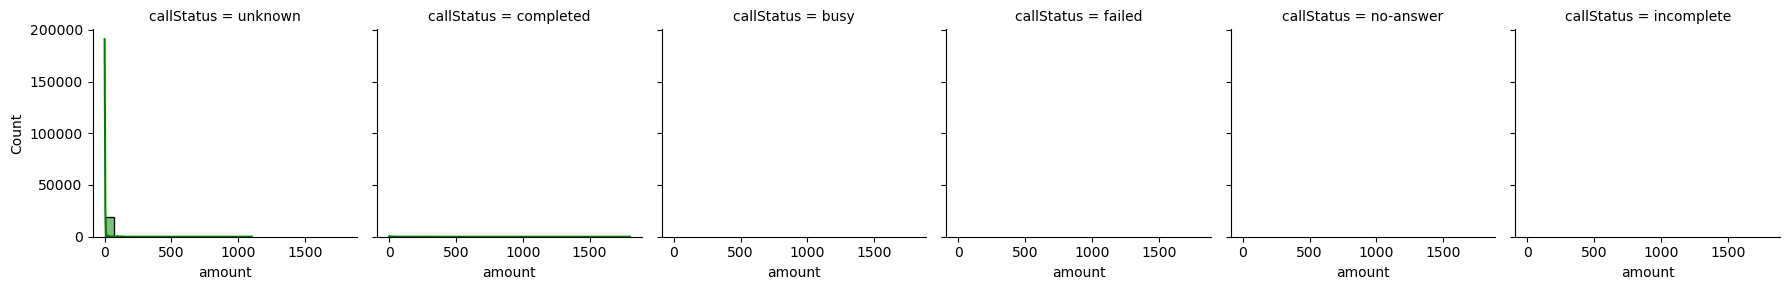

In [43]:
x=sns.FacetGrid(df,col='callStatus',col_wrap=6)
x.map(sns.histplot,'amount',kde=True,color='green')

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='amount', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of call charges')

Text(0, 0.5, 'Frequency')

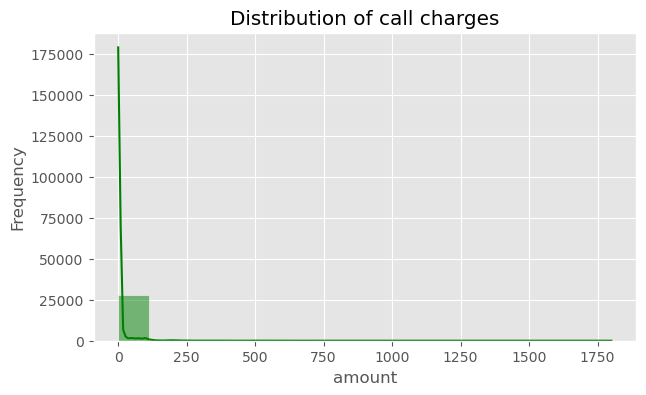

In [44]:
plt.figure(figsize=(7,4))
plt.style.use('ggplot')
sns.histplot(x='amount',kde=True,data=df,color='green')
plt.title('Distribution of call charges')
plt.ylabel('Frequency')
plt.show()

# insights:
# we can see that amount column is right skweed, which means it contains outliers

#  Task 2: Call Center Performance Metrics

#  5. Calculate the average TalkTime for different call activities (Activity column)

In [45]:
# we dont have activity column, so we will use call status column

df.groupby('callStatus').agg({'timeDuration':'mean'}).reset_index()

# note: the unknown columns indicates the customer consulted on chat.

# the avg talk time for completed call is 4.72 minutes.

,callStatus,timeDuration
0,busy,0.000000
1,completed,4.727163
2,failed,0.005245
3,incomplete,0.277429
4,no-answer,0.000000
5,unknown,1.385795


#  6. Determine the most common source of calls (Source column)

In [46]:
df['source'].value_counts().idxmax()

# the most common source is production

'Production'

# 7. Calculate the total earnings and spending for both users and masters

In [47]:
# total earning of guru

round(df['astrologersEarnings'].sum())
# total earning of guru is 99,147

99147

In [48]:
# total spending of users

round(df['amount'].sum())

# total spending of user is 2,14,066.

214066

#  8. Analyze the relationship between TalkTime and Charge

<Figure size 400x300 with 0 Axes>

<Axes: >

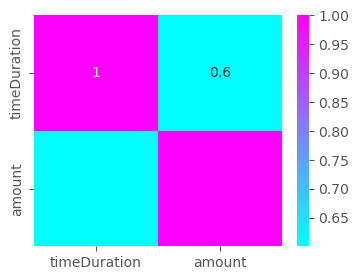

In [49]:
corr=df[['timeDuration','amount']].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr,annot=True,cmap='cool')

# there is a positive strong corelatio between talktime and charge

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='timeDuration', ylabel='amount'>

Text(0.5, 1.0, 'Relation between talk-time and charge')

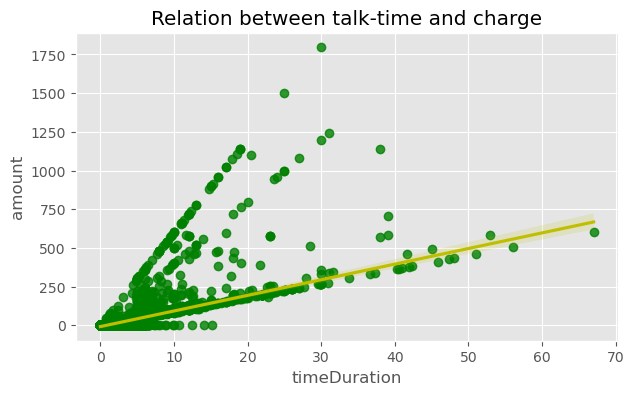

In [50]:
# lets visualize it in scatter plot

plt.figure(figsize=(7,4))
sns.regplot(x='timeDuration',y='amount',data=df,line_kws={'color':'y'},scatter_kws={'color':'g'})
plt.title('Relation between talk-time and charge')

# regression line is uppward slopping, which means its a positive relation

# Task 3: Call Handling Analysis

# 9. Calculate the average time it takes for calls to be connected (ConnectTime- DialTime).

In [51]:
# NOTE : we dont have connect time and dial time columns, we can use createdat and updatedat columns as dial_time and connecttime.

df['connection_time']=(df['updatedAt']-df['createdAt']).dt.total_seconds()

avg=df['connection_time'].mean()

print(f'Avg time for call connection in seconds : {avg}')

Avg time for call connection in seconds : 3404.6974919185072


#  10. Identify the most common reason for call disconnection (UnconnectTime- ConnectTime).

In [52]:
# we dont have disconnection columns because it had 99% of missing data, so we droped the column.

#  11. Analyze the HangUpTime patterns and identify any trends.

<Axes: >

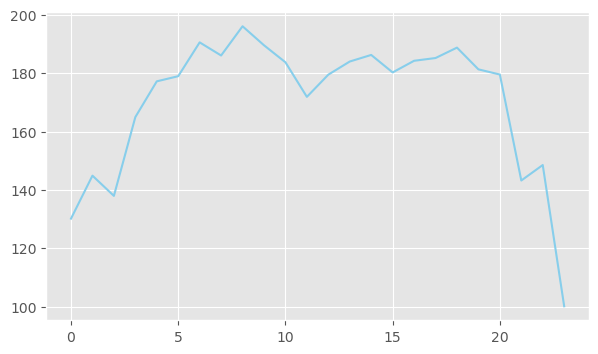

In [99]:
# for hangup patter we will use chat_start_time and chat_end_time

df['chatDurationSeconds']=(df['chatEndTime']-df['chatStartTime']).dt.total_seconds()
# we got the duration

# filling missing values with median

df['chatDurationSeconds']=df['chatDurationSeconds'].fillna(df['chatDurationSeconds'].median())

# excluding nevative values

df=df.loc[df['chatDurationSeconds']>0]

# extracting hour of the day from chat_end_time

df['hour']=df['chatEndTime'].dt.hour

df.groupby('hour')['chatDurationSeconds'].mean().reset_index(drop=True).plot.line(figsize=(7,4),color='skyblue')

#  Task 4: Order and Refund Analysis

#  12. Determine the order status distribution for calls.

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='callStatus', ylabel='count'>

Text(0.5, 1.0, 'Distribution of callstatus')

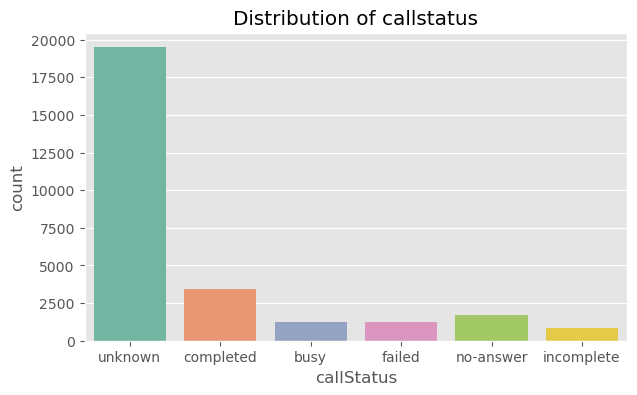

In [85]:
# we dont have order status distribution,we will use callstatus column

plt.figure(figsize=(7,4))
sns.countplot(x='callStatus',data=df,palette='Set2')
plt.title('Distribution of callstatus')

# note : the unknown column here represent that the majority of users consulted with chat.

#  13. Calculate the total refund amount and identify the refund status distribution.

In [ ]:
# we droped the refund amount column because it had 99% of missing data, nd there is no way we can impute it with anything

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='refundStatus', ylabel='count'>

Text(0.5, 1.0, 'Distribution of refund status')

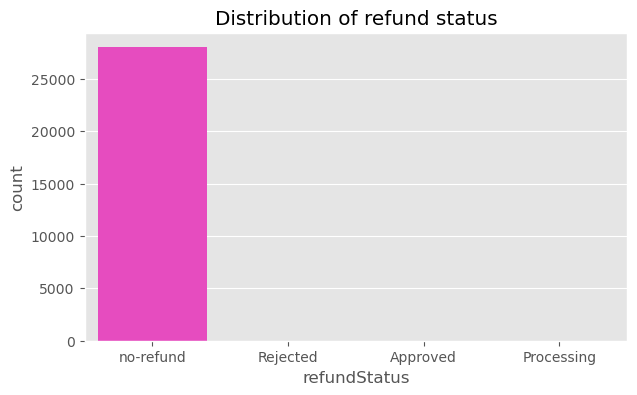

In [89]:
# analysing refund status distribution

plt.figure(figsize=(7,4))
sns.countplot(x='refundStatus',data=df,palette='spring')
plt.title('Distribution of refund status')

# no money has been refunded

#  7-aAdditional Visualizations

#  create a line chart showing the trend in call charges over time.

<Figure size 1800x500 with 0 Axes>

Text(0.5, 1.0, 'Trend of call charges over time')

Text(0, 0.5, 'Charges')

Text(0.5, 0, 'Date')

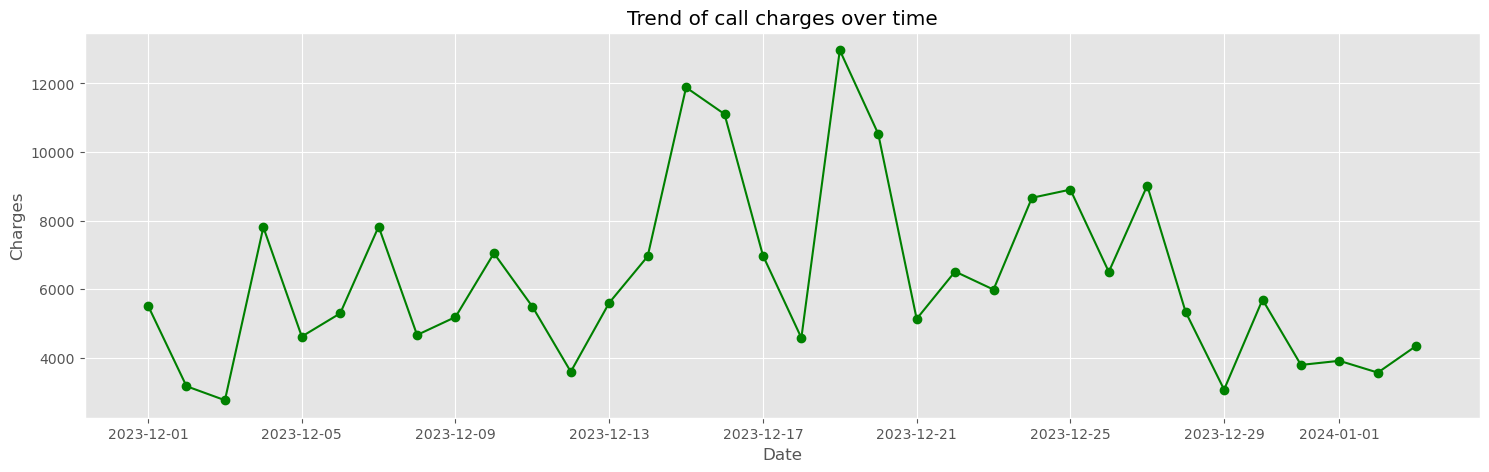

In [111]:
call_trend = df.groupby(df['createdAt'].dt.date)['amount'].sum()
plt.figure(figsize=(18,5))
plt.plot(call_trend.index,call_trend,color='g',marker='o')
plt.title('Trend of call charges over time')
plt.ylabel('Charges')
plt.xlabel('Date')

# Create a scatter plot to analyze the relationship between TalkTime and UserSpend.

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='timeDuration', ylabel='amount'>

Text(0.5, 1.0, 'Relation between talk-time and charge')

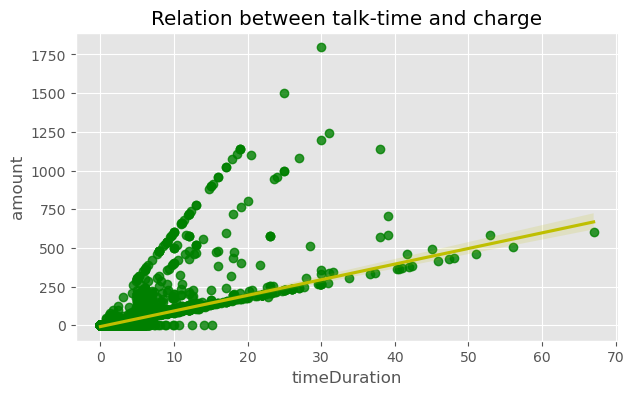

In [112]:
plt.figure(figsize=(7,4))
sns.regplot(x='timeDuration',y='amount',data=df,line_kws={'color':'y'},scatter_kws={'color':'g'})
plt.title('Relation between talk-time and charge')

# there is a positive strong corelation between talk time nd charges
# if the talk time increases, charges also increases

In [78]:
df

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,isWhiteListUser,chatSeconds,queue,freeCall,freeChat,createdAt,updatedAt,__v,statementEntryId,chatStartTime,chatEndTime,timeDuration,callChannel,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,region,userCallStatus,userOnCallDuration,hideHistory,offer,source,connection_time,chatDurationSeconds,hour
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:04:02.993000+00:00,2023-12-01 00:07:33.833000+00:00,0,656922f3919324acb6e8713b,2023-12-01 00:07:33.248000+00:00,2023-12-01 00:07:33.773000+00:00,0.008750,unknown,unknown,0.00,unknown,0.0,0.000,0.00,unknown,unknown,0.0,False,no offer,unknown,210.840,0.525,0.0
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:08:51.903000+00:00,2023-12-01 00:09:56.111000+00:00,0,65692413919324acb6e87443,2023-12-01 00:09:55.808000+00:00,2023-12-01 00:09:56.052000+00:00,0.004067,unknown,unknown,0.00,unknown,0.0,0.000,0.00,unknown,unknown,0.0,False,no offer,unknown,64.208,0.244,0.0
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:17:22.270000+00:00,2023-12-01 00:22:04.382000+00:00,0,65692612919324acb6e8773a,2023-12-01 00:22:04.072000+00:00,2023-12-01 00:22:04.325000+00:00,0.004217,unknown,unknown,0.00,unknown,0.0,0.000,0.00,unknown,unknown,0.0,False,no offer,unknown,282.112,0.253,0.0
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,False,300.0,False,False,True,2023-12-01 00:24:41.672000+00:00,2023-12-01 00:29:44.022000+00:00,0,656927c9919324acb6e87b31,2023-12-01 00:29:43.556000+00:00,2023-12-01 00:29:43.960000+00:00,0.006733,unknown,unknown,0.00,unknown,0.0,0.000,0.00,unknown,unknown,0.0,False,no offer,unknown,302.350,0.404,0.0
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,False,300.0,False,False,False,2023-12-01 00:48:53.744000+00:00,2023-12-01 00:50:33.153000+00:00,0,65692d75919324acb6e882df,NaT,NaT,0.000000,unknown,unknown,0.00,unknown,0.0,0.000,0.00,unknown,unknown,0.0,False,no offer,unknown,99.409,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,6595ef62849de2bb564ed9fb,6592ef86270572b0ca26a3e3,completed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,43361,Chat,gurucool,no-refund,False,2580.0,False,False,False,2024-01-03 23:36:02.872000+00:00,2024-01-03 23:37:57.348000+00:00,0,6595ef62849de2bb564ed9fd,2024-01-03 23:36:10.118000+00:00,2024-01-03 23:37:57.259000+00:00,1.616667,unknown,unknown,14.55,completed,0.0,7.275,14.55,Indian,completed,0.0,False,normal,Test,114.476,107.141,23.0
28023,6595f1f3849de2bb564edd7e,6592ef86270572b0ca26a3e3,unknown,65054784f5f203225bfcdcd1,Tarot Rupanshi,74,43361,Call,app,no-refund,False,0.0,False,False,False,2024-01-03 23:46:59.765000+00:00,2024-01-03 23:47:50.319000+00:00,0,6595f1f4849de2bb564edd81,NaT,NaT,0.000000,Normal,failed,0.00,failed,0.0,0.000,0.00,unknown,unknown,0.0,False,normal,Test,50.554,NaN,NaN
28024,6595f23d849de2bb564ee1c9,6592ef86270572b0ca26a3e3,unknown,65054786f5f203225bfcdd0d,Astro Sanjeev,95,43361,Call,app,no-refund,False,0.0,False,False,False,2024-01-03 23:48:13.271000+00:00,2024-01-03 23:48:37.907000+00:00,0,6595f23d849de2bb564ee1cc,NaT,NaT,0.000000,Normal,failed,0.00,completed,9.0,0.000,0.00,unknown,canceled,0.0,False,normal,Test,24.636,NaN,NaN
28025,6595f384883c1bbae79c58e3,6595f36c883c1bbae79c57c9,failed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,44005,Chat,guru